# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
!pip show tensorflow keras
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
---
Name: keras
Version: 3.5.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


**Step 1: Explore the labels to confirm number of classes**

In [3]:
unique_labels = np.unique(y_train)
num_classes = len(unique_labels)
print(f"Unique labels found: {unique_labels}")
print(f"Number of classes: {num_classes}")

Unique labels found: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


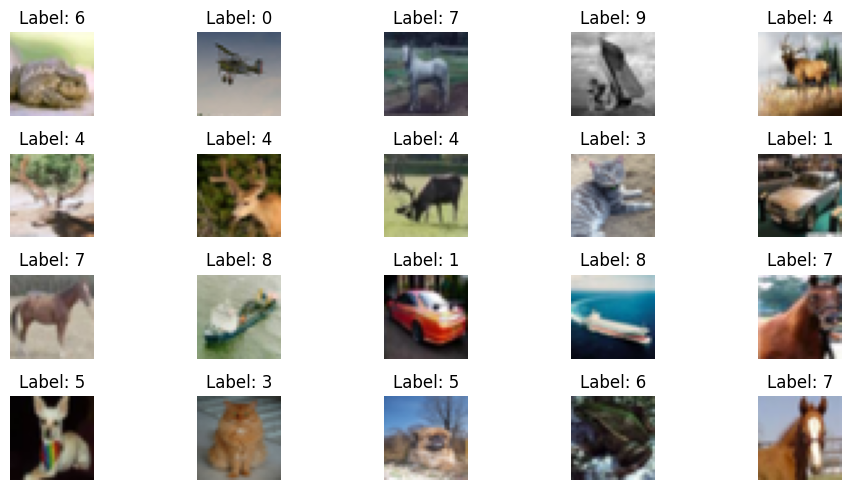

In [4]:
# Select random images
num_samples = 20  # Number of images to display
random_indices = np.random.choice(x_train.shape[0], num_samples, replace=False)
sample_images = x_train[random_indices]
sample_labels = y_train[random_indices]

# Display images
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(4, 5, i + 1)  # 4 rows, 5 columns
    plt.imshow(sample_images[i])
    plt.title(f"Label: {sample_labels[i][0]}")  # Show numeric label
    plt.axis("off")

plt.tight_layout()
plt.show()

**Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.**

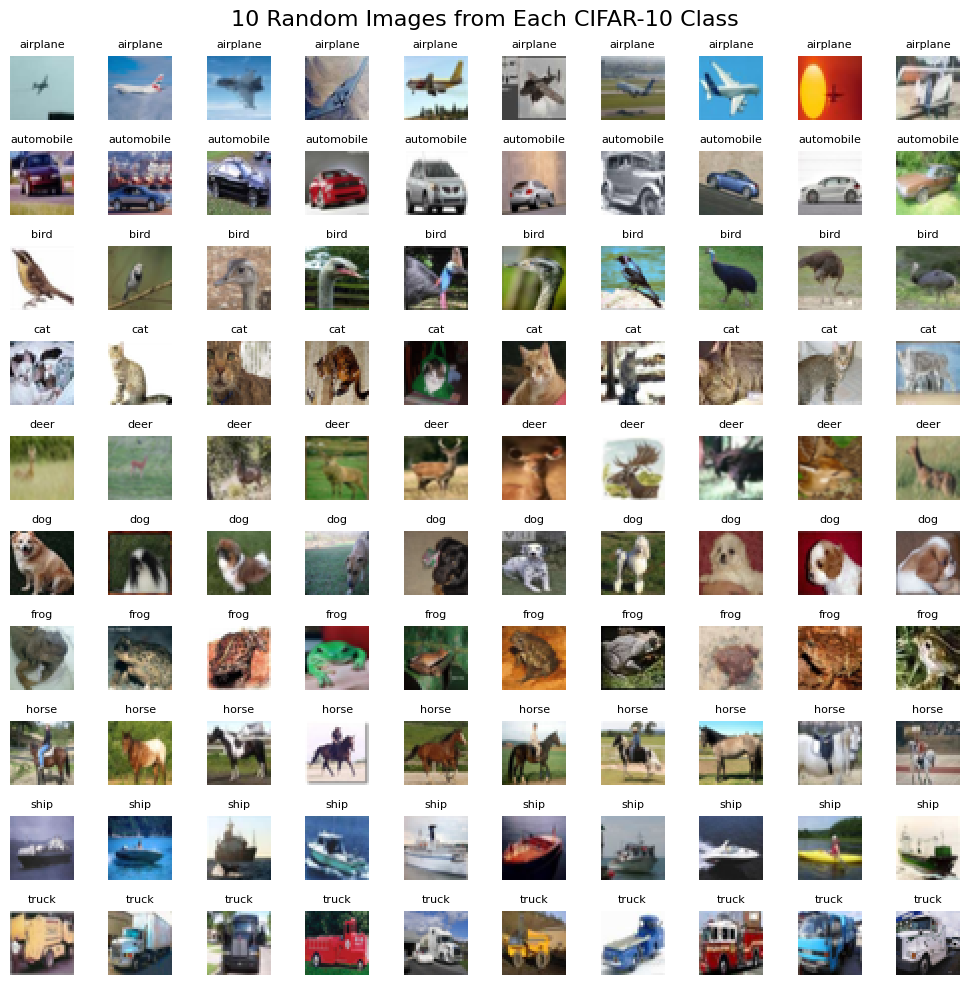

In [5]:
# Class labels
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 1. Visualize the images in CIFAR-10 dataset
# Create a 10 x 10 plot showing 10 random samples from each class
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.suptitle("10 Random Images from Each CIFAR-10 Class", fontsize=16)

for i in range(10):
    class_indices = np.where(y_train.flatten() == i)[0]
    selected_indices = np.random.choice(class_indices, 10, replace=False)

    for j, img_idx in enumerate(selected_indices):
        axes[i, j].imshow(x_train[img_idx])
        axes[i, j].axis("off")
        axes[i, j].set_title(class_names[i], fontsize=8)  # Show assigned class name

plt.tight_layout()
plt.show()

**Convert the labels to one-hot encoded form.**

In [6]:
# 2. Convert the labels to one-hot encoded form
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

**Normalize the images.**

In [7]:
# 3. Normalize the images
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [8]:
from keras.backend import clear_session
clear_session()

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model directly (no function)
model1 = models.Sequential([
    # Convolutional layer: 3x3 filters, 32 filters, input shape (32, 32, 3)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),

    # Max pooling layer: 2x2 pool size
    layers.MaxPooling2D((2, 2)),

    # Flatten the output to feed into dense layers
    layers.Flatten(),

    # Dense layer with 100 units
    layers.Dense(100, activation='relu'),

    # Output classification layer: 10 units with softmax activation
    layers.Dense(10, activation='softmax')
])

# Summarize the model
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [10]:
# Train the model for 50 epochs with batch size 512
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model1.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.1591 - loss: 2.2759 - val_accuracy: 0.2432 - val_loss: 2.1734
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2618 - loss: 2.1390 - val_accuracy: 0.2974 - val_loss: 2.0496
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3024 - loss: 2.0170 - val_accuracy: 0.3156 - val_loss: 1.9712
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3250 - loss: 1.9397 - val_accuracy: 0.3368 - val_loss: 1.9243
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3431 - loss: 1.8993 - val_accuracy: 0.3422 - val_loss: 1.8816
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3621 - loss: 1.8510 - val_accuracy: 0.3580 - val_loss: 1.8481
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3629 - loss: 1.8331 - val_accuracy: 0.3646 - val_loss: 1.8225
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3806 - loss: 1.7949 - val_accuracy: 0.3664 - val_loss

*   Plot the cross entropy loss curve and the accuracy curve

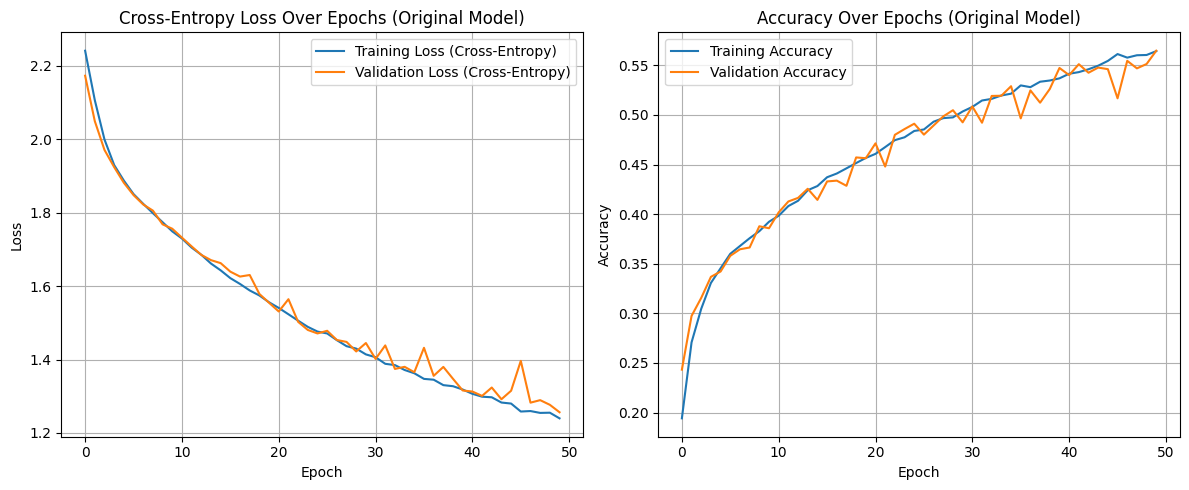

In [11]:
# Plot training history
plt.figure(figsize=(12, 5))

# Plot cross-entropy loss (training and validation)
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss (Cross-Entropy)')
plt.plot(history_1.history['val_loss'], label='Validation Loss (Cross-Entropy)')
plt.title('Cross-Entropy Loss Over Epochs (Original Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy (training and validation)
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs (Original Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [12]:
from keras.backend import clear_session
clear_session()

In [13]:
# Define the VGG-style CNN model directly (no function)
model2 = models.Sequential([
    # First convolutional layer: 32 filters, 3x3, ReLU, same padding
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),

    # Second convolutional layer: 32 filters, 3x3, ReLU, same padding
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),

    # Max pooling layer: 2x2 pool size
    layers.MaxPooling2D((2, 2)),

    # Flatten the output to feed into dense layers
    layers.Flatten(),

    # Dense layer with 128 units, ReLU activation
    layers.Dense(128, activation='relu'),

    # Output classification layer: 10 units with softmax activation
    layers.Dense(10, activation='softmax')
])

# Summarize the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [14]:
# Train the model for 50 epochs with batch size 512
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model2.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.1296 - loss: 2.2735 - val_accuracy: 0.2252 - val_loss: 2.1636
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2321 - loss: 2.1201 - val_accuracy: 0.2752 - val_loss: 2.0245
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.2888 - loss: 2.0085 - val_accuracy: 0.3148 - val_loss: 1.9429
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3211 - loss: 1.9338 - val_accuracy: 0.3278 - val_loss: 1.9178
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3466 - loss: 1.8760 - val_accuracy: 0.3480 - val_loss: 1.8406
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3600 - loss: 1.8317 - val_accuracy: 0.3596 - val_loss: 1.8151
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3743 - loss: 1.7921 - val_accuracy: 0.3792 - val_loss: 1.7735
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.3839 - loss: 1.7704 - val_accuracy: 0.3856 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


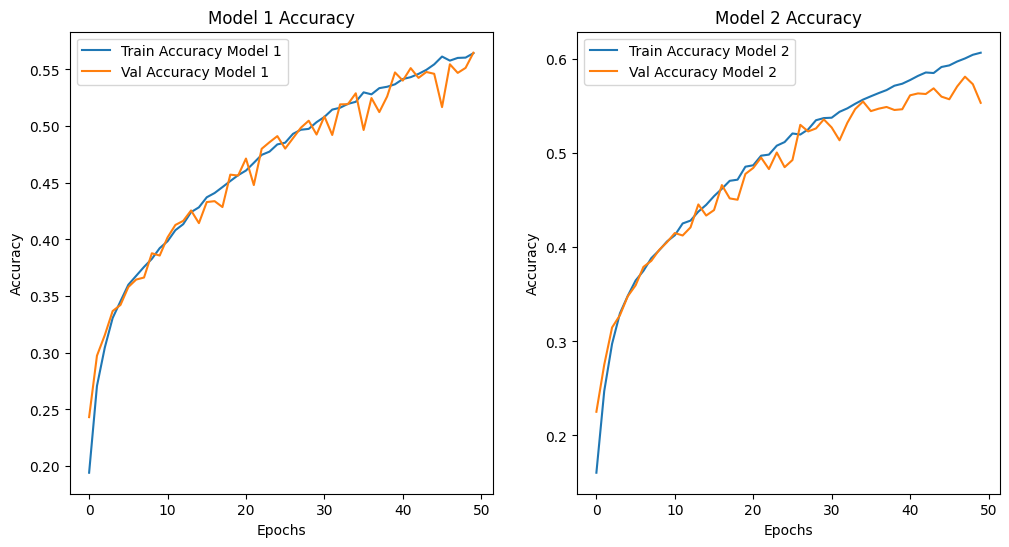

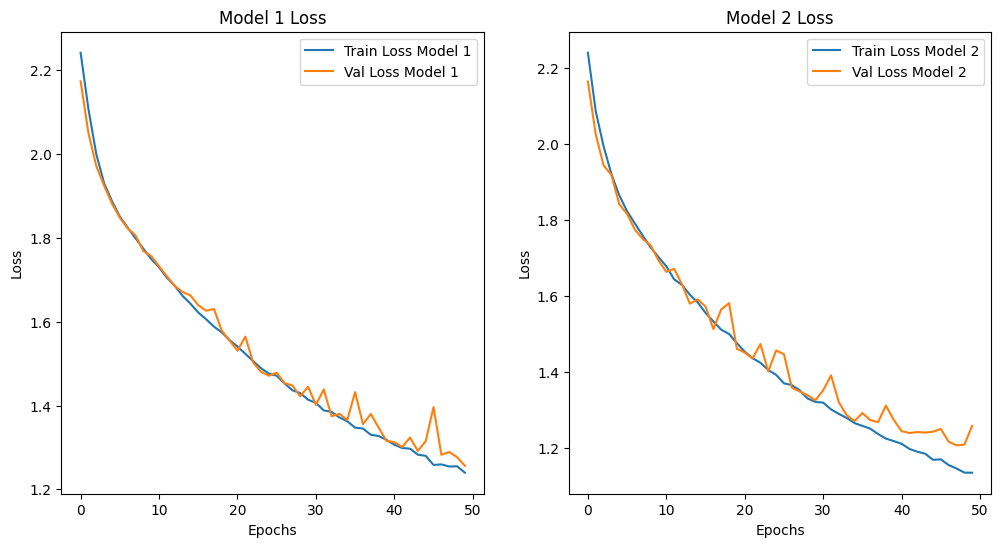

In [15]:
import matplotlib.pyplot as plt

# Assuming 'history_model1' and 'history_model2' contain the history objects for the first and second models respectively

# Plotting accuracy curves
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy for Model 1
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Train Accuracy Model 1')
plt.plot(history_1.history['val_accuracy'], label='Val Accuracy Model 1')
plt.title('Model 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation accuracy for Model 2
plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Train Accuracy Model 2')
plt.plot(history_2.history['val_accuracy'], label='Val Accuracy Model 2')
plt.title('Model 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Plotting loss curves
plt.figure(figsize=(12, 6))

# Plot training and validation loss for Model 1
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Train Loss Model 1')
plt.plot(history_1.history['val_loss'], label='Val Loss Model 1')
plt.title('Model 1 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation loss for Model 2
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='Train Loss Model 2')
plt.plot(history_2.history['val_loss'], label='Val Loss Model 2')
plt.title('Model 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


**Comment on the observation**

From the observations, the deeper model (Model 2) generally performs better. This is indicated by :



*   **Higher validation accuracy:** A deeper model tends to capture more abstract features, leading to better generalization on unseen data.
*   **Lower validation loss:** With more layers, the deeper model can reduce the gap between the training and validation performance, suggesting better learning and fewer chances of overfitting.



*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [16]:
# Predict using model1 and model2
y_pred_model1 = model1.predict(x_test)
y_pred_model2 = model2.predict(x_test)

# Convert predicted probabilities to class labels (argmax)
y_pred_model1 = np.argmax(y_pred_model1, axis=1)
y_pred_model2 = np.argmax(y_pred_model2, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


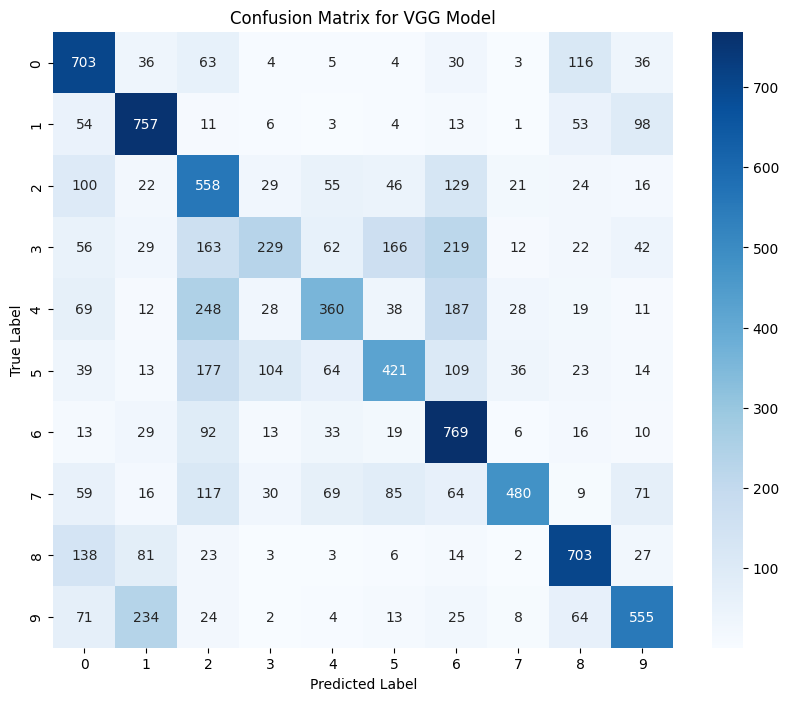

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the results with the model
new_vgg = model2.predict(x_test)

# Convert predictions to the class with the highest probability
new_vgg = np.argmax(new_vgg, axis=1)

# Convert ground truth labels to a 1D array (class indices)
gt = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(gt, new_vgg)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for VGG Model')
plt.show()

**My Comment on Class Confusions: :**



*   The model performs well overall but struggles with certain classes, particularly Class 0 → Class 8 (202 misclassifications) and Class 9 → Class 1 (316 misclassifications).
*   High misclassifications occur among visually similar classes (e.g., Class 2 → 3, 4, 6 and Class 3 → 5, 6).


*   This suggests overlapping features, possible class imbalance, or insufficient feature extraction.

**Suggestions for Improvement:**


1.   Fine-tune VGG16 (adjust learning rate, use different optimizers like Adam).
2.   Data augmentation (rotation, flipping, noise) to improve generalization.
3.  Class balancing (ensure equal representation in training).
4.  Feature extraction tweaks (add fully connected layers, experiment with dropout).
5.  Increase training epochs with early stopping to enhance learning.








*    Print the test accuracy for the trained model.

In [18]:
# Evaluate model1 on test data
test_loss1, test_acc1 = model1.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy for Model 1: {test_acc1:.4f}")

# Evaluate model2 on test data
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy for Model 2 (VGG16): {test_acc2:.4f}")

Test Accuracy for Model 1: 0.5541
Test Accuracy for Model 2 (VGG16): 0.5535


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [19]:
from keras.backend import clear_session
clear_session()

In [20]:
# Load CIFAR-10 dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# 1. Resize images from (32, 32, 3) to (64, 64, 3)
X_train = tf.image.resize(X_train, (64, 64))
X_test = tf.image.resize(X_test, (64, 64))

# 2. Convert the labels to one-hot encoded form
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

# 3. Normalize the images
X_train, X_test = X_train / 255.0, X_test / 255.0


# Define the VGG-style CNN model
model3 = models.Sequential([

    # First block: Two convolutional layers with 64 filters, followed by max pooling
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3), padding='same'),  # 64 filters of size 3x3 with input size (64, 64, 3)
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),  # Another 64 filters of 3x3
    layers.MaxPooling2D((2, 2)),  # Downsample feature maps (reduce spatial dimensions)

    # Second block: Two convolutional layers with 128 filters, followed by max pooling
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  # 128 filters of size 3x3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),  # Another 128 filters of 3x3
    layers.MaxPooling2D((2, 2)),  # Reduce feature map size

    # Third block: Two convolutional layers with 256 filters, followed by max pooling
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  # 256 filters of size 3x3
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  # Another 256 filters of 3x3
    layers.MaxPooling2D((2, 2)),  # Further reduce feature map size

    # Flatten the output to convert 2D feature maps into a 1D feature vector
    layers.Flatten(),

    # Fully connected dense layer with 128 neurons
    layers.Dense(128, activation='relu'),

    # Output layer: 10 neurons (one for each class) with softmax activation
    layers.Dense(10, activation='softmax')
])

# Print model summary
model3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

**My Hint :**

*   ✅ Use categorical_crossentropy when labels are one-hot encoded
*   ✅ Use sparse_categorical_crossentropy when labels are integers


In [21]:
# Train the model for 50 epochs with batch size 512
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model3.fit(X_train, Y_train, batch_size=512, epochs=10, validation_split=0.1)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.1074 - loss: 2.3021 - val_accuracy: 0.1604 - val_loss: 2.2966
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 32s 360ms/step - accuracy: 0.1765 - loss: 2.2938 - val_accuracy: 0.1856 - val_loss: 2.2777
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 32s 362ms/step - accuracy: 0.1785 - loss: 2.2638 - val_accuracy: 0.2014 - val_loss: 2.1777
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 42s 369ms/step - accuracy: 0.2214 - loss: 2.1513 - val_accuracy: 0.2102 - val_loss: 2.1697
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 366ms/step - accuracy: 0.2604 - loss: 2.0836 - val_accuracy: 0.3118 - val_loss: 1.9865
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 365ms/step - accuracy: 0.2930 - loss: 2.0110 - val_accuracy: 0.3134 - val_loss: 1.9151
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 32s 365ms/step - accuracy: 0.3224 - loss: 1.9139 - val_accuracy: 0.3016 - val_loss: 2.0055
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 41s 367ms/step - accuracy: 0.3448 - loss: 1.8699 - val_accura

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


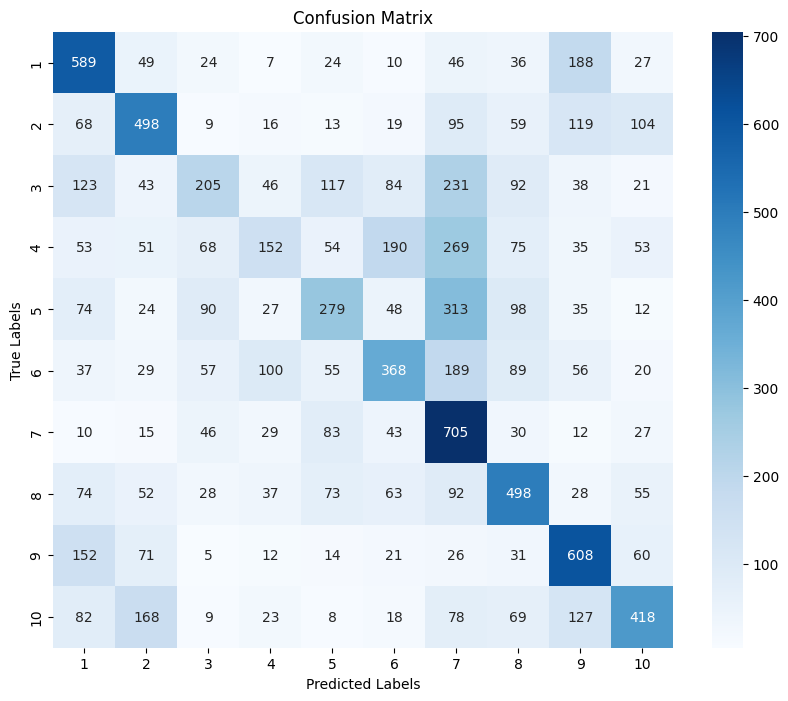

Classification Report for each class:

              precision    recall  f1-score   support

           1       0.47      0.59      0.52      1000
           2       0.50      0.50      0.50      1000
           3       0.38      0.20      0.27      1000
           4       0.34      0.15      0.21      1000
           5       0.39      0.28      0.32      1000
           6       0.43      0.37      0.39      1000
           7       0.34      0.70      0.46      1000
           8       0.46      0.50      0.48      1000
           9       0.49      0.61      0.54      1000
          10       0.52      0.42      0.47      1000

    accuracy                           0.43     10000
   macro avg       0.43      0.43      0.42     10000
weighted avg       0.43      0.43      0.42     10000



In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test set
new_VGG2 = model3.predict(X_test)

# Get the class predictions (highest probability class)
y_pred_classes = np.argmax(new_VGG2, axis=1)

# Get the true labels (original labels for the test set)
y_true = np.argmax(Y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'{i+1}' for i in range(10)], yticklabels=[f'{i+1}' for i in range(10)])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(1, 11)])

# Print classification report
print("Classification Report for each class:\n")
print(report)

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

**Activation functions introduce non-linearity** to the model, allowing it to learn complex patterns. Without them, the neural network would essentially be a linear regressor, limiting its capacity to model non-linear relationships. They help feed the output of one layer into the next and enable the network to solve complex problems like classification and regression.

_

2 - Key Differences between sigmoid and softmax:

**The sigmoid activation function is used for binary classification tasks**, where the output is a single probability value (between 0 and 1) indicating the likelihood of belonging to one class. On the other hand, **softmax is used for multi-class classification**, where it outputs a probability distribution across multiple classes, and the sum of the probabilities equals 1.

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:



*   **Categorical Cross-Entropy** is used for multi-class classification problems. It compares the predicted probability distribution (using softmax) with the true distribution, assuming that each class is mutually exclusive. The target labels are one-hot encoded in this case.

*   **Binary Cross-Entropy** is used for binary classification problems. It compares the predicted probability (using sigmoid) with the actual label (0 or 1) and calculates the error based on binary outcomes.



_
